# Mercari Price Prediction

Mercari es la aplicación de compras impulsada por la comunidad más grande de Japón donde la gente puede vender y comprar una variedad de productos nuevos y usados de diferentes marcas, desde suéteres hasta teléfonos inteligentes. 

A continuación encontraras una base de datos con información sobre los productos vendidos en la plataforma. 

### Objetivo: 

Tu objetivo es realizar un analisis exploratorio de datos (EDA) y si es posible determinar algunas conclusiones sobre las ventas registradas.

### Base de datos

La informacion de los productos vendidos esta disponible mediante un archivo *train100.csv* discriminada con la siguiente información.

| nombre columna     | significado         |  
| ------------------| -------------------- |  
| train_id          | id del producto      |  
| name               | nombre del producto  |  
| item_condition_id  | condiciones en la que esta disponible el producto. Entre más bajo el valor mejor la condición en la que se encuentra|  
| category_name  |  Categoria del producto  |  
| brand_name | Nombre de la marca |  
| shipping   | 1= domicilio lo pago el vendedor, 0=domicilio lo pago el comprador   |  
| item_description  | Descripción del producto  |  
|  price | Precio por el cual fue vendido el producto   |  

### Cargando librerias necesarias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Leyendo la base de datos

In [2]:
data = pd.read_csv("train100.csv")
data.shape

(100000, 8)

## ANÁLISIS EXPLORATORIO DE DATOS (EDA)

El análisis exploratorio de datos se refiere al proceso crítico de realizar investigaciones iniciales sobre los datos para descubrir patrones, detectar anomalías, probar hipótesis y verificar suposiciones con la ayuda de estadísticas resumidas y representaciones gráficas.

In [3]:
data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [4]:
data["shipping"].mean()

0.44753

In [5]:
data["item_condition_id"].mean()

1.90776

### Ejercicio 

Muestra sobre la pantalla el resumen general de los datos almacenados en el archivo *ventas.tsv*

#### respuesta

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   train_id           100000 non-null  int64  
 1   name               100000 non-null  object 
 2   item_condition_id  100000 non-null  int64  
 3   category_name      99583 non-null   object 
 4   brand_name         57076 non-null   object 
 5   price              100000 non-null  float64
 6   shipping           100000 non-null  int64  
 7   item_description   100000 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 6.1+ MB


### Ejercicio

Accede al número de registros de la base de datos e imprimela sobre la pantalla.

#### Respuesta

In [7]:
data.shape

(100000, 8)

In [8]:
print('La cantidad de registros es de ',data.shape[0])

La cantidad de registros es de  100000


### Ejercicio

Que información podemos extraer sobre los datos obtenidos en la columna *Price*?

Por ejemplo algunas medidas estadísticas

#### Respuesta

In [9]:
data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [10]:
data["price"].describe()

count    100000.000000
mean         26.698405
std          37.942441
min           0.000000
25%          10.000000
50%          17.000000
75%          29.000000
max        1506.000000
Name: price, dtype: float64

### Ejercicio

Muestra las medidas estadísticas con limitado a 3 decimales

#### respuesta

In [11]:
np.round(data["price"].describe(),3)

count    100000.000
mean         26.698
std          37.942
min           0.000
25%          10.000
50%          17.000
75%          29.000
max        1506.000
Name: price, dtype: float64

### Ejercicio

Como ha sido la distribución de los precios de los artículos vendidos?
Haga un histograma que muestre la distribución de artículos vendidos de acuerdo al precio. El histograma debe tener 15 pulgadas de largo y 5 de alto. El eje X nombrelo *precio* con un tamaño de letra de 15px, el eje Y nombrelo *no de artículos con ese precio o frecuencia* con un tamaño de letra de 14px. Ponga un título que indique "Distribución de artículos según el precio". Ajuste el número de bins a 50 y límite el rango de precios de 0 a 500.
Las columnas deben ser distinguibles.

#### Respuesta

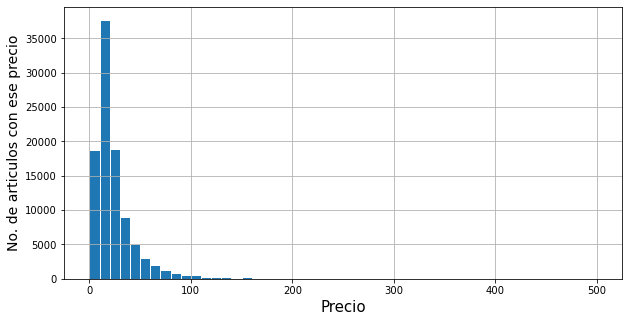

In [12]:
data['price'].hist(bins=50, figsize=(10,5), edgecolor='white', range=[0,500])
plt.xlabel("Precio", fontsize=15)
plt.ylabel("No. de articulos con ese precio", fontsize=14)
plt.show()


Con base en las estadísticas anteriores, las observaciones son las siguientes:

* El ** precio medio ** de los artículos es ** 17 dólares **.
* Su ** promedio     ** es de ** 26.738 **.  
* La mayoria de artículos tuvieron un precio hasta maximo 200 dólares.
* La ** distribución de precios ** de los artículos está muy ** sesgada hacia la derecha **.
* El precio representa una variable *numérica* porque puede tomar cualquier valor del conjunto de los reales.

### Ejercicio 

Que información se puede obtener de la columna *Shipping* ?

Según definición *Shipping* solo puede tener 2 valores:    

1= el envio del artículo lo asume el vendedor.  
0= el envio del artículo lo asume el comprador  

#### respuesta

Shipping es una variable *categorica* de tipo enumerado.

### Que es una variable categórica?

#### Respuesta: 
Las variables categóricas contienen un número finito de categorías o grupos distintos. Los datos categóricos pueden no tener un orden lógico. Puede adoptar valores numéricos o alfanuméricos.

La variable categórica es la que se usa en estadística para asignar una característica o propiedad no-numérica o cualitativa a algún objeto, individuo, entidad, condición o procedimiento. Es posible definir toda clase de variables categóricas de acuerdo a cada necesidad. 

Ejemplos de variables categóricas son: color, sexo, grupo sanguíneo, estado civil, tipo de material, forma de pago o tipo de cuenta bancaria, y se utilizan mucho cotidianamente.  

Sin embargo la misma variable sexo puede ser declarada y almacenada como un número entero si es que a Varón se le asigna 1 y a Hembra se le asigna el valor 2. Es por esta razón que a las variables categóricas se les denomina  a veces de tipo enumerado.  

La principal característica de las variables categóricas es que a diferencia de otras variables, como las continuas y las discretas, no es posible hacer aritmética con ellas. Sin embargo se puede hacer estadística con ellas, como se verá más adelante.  


### Que es un término alfanumérico?

El término alfanumérico abarca todas las letras y números en un conjunto de idiomas determinado, y por extensión, a los números alfanuméricos. Por lo general, los caracteres alfanuméricos son los que comprenden el conjunto combinado de los 26 caracteres alfabéticos, de la A a la Z, y los 10 números arábigos, del 0 al 9.

In [13]:
data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


### Ejercicio

De la base de datos cuantos artículos fueron enviados a cargo del comprador y cuántos a cargo del vendedor?

#### respuesta

El método *value_counts()* se utiliza en columnas formadas por variables categoricas para determinar el número de registros que coinciden con cada uno de los valores.

normalize = True -> retorna la frecuencia relativa.


In [14]:
data['shipping'].value_counts()

0    55247
1    44753
Name: shipping, dtype: int64

### Accediendo a los resultados del value_counts()

In [15]:
data["shipping"].value_counts()[1]/data["shipping"].count()

0.44753

Otra forma diferente de hacerlo

In [16]:
data["shipping"].value_counts(normalize=True)

0    0.55247
1    0.44753
Name: shipping, dtype: float64

### Ejercicio

Sobreponga en un mismo grafico el histograma de los artículos vendidos y enviados a cargo del vendedor y el histograma fue el envio fue a cargo de comprador.

#### Respuesta

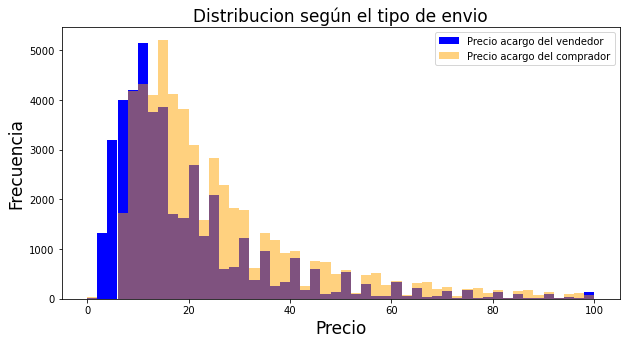

In [17]:
# Primero extraer los datos que pertenece a cada categoria
shipping_vendedor  = data[data["shipping"]==1]["price"]
shipping_comprador = data[data["shipping"]== 0]["price"]

fig, ax = plt.subplots(figsize=(10,5))
ax.hist(shipping_vendedor, color='blue', bins=50, range=[0,100],alpha=1.0, label='Precio acargo del vendedor')
ax.hist(shipping_comprador, color='Orange', bins=50, range=[0,100],alpha=0.5, label='Precio acargo del comprador')
plt.xlabel('Precio', fontsize=17)
plt.ylabel('Frecuencia', fontsize=17)
plt.title('Distribucion según el tipo de envio', fontsize=17)
plt.legend()
plt.show()



### Ejercicio

Que información se puede obtener sobre la condición en la que fue ofrecido el producto?



### Ejercicio

Que tipo de variable es item_condition_id?

#### Respuesta

Una forma de averiguar el tipo de variable que representa los datos de una columna es mediante el método unique(), el cual retorna el número de valores únicos presentes en la columna.


In [18]:
data["item_condition_id"].unique()

array([3, 1, 2, 4, 5], dtype=int64)

### Ejercicio 

Que retorna value_counts()?

#### Respuesta:

El método value_counts() retorna un objeto de tipo Series (=equivalente a una columna de un dataframe) que agrupoa los diferentes categorias con sus frecuencias 

In [19]:
data["item_condition_id"].value_counts()

1    43123
3    29072
2    25475
4     2163
5      167
Name: item_condition_id, dtype: int64

### Ejercicio

Muestra en un diagrama de barras la distribucion de ventas de artículos según los diferentes tipos de condicion en la que se encontraban.

*Que son diagramas de barras? *    
Una diagrama de barra es un método de visualización que permite presentar la relación entre diferentes grupos de datos.

#### Resultado

Text(0, 0.5, 'Frecuencia')

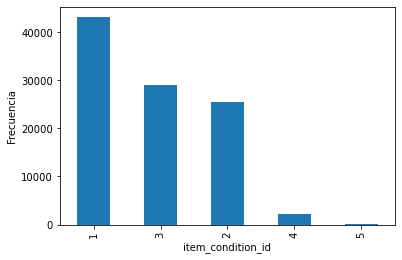

In [20]:
# diagrama vertical
data["item_condition_id"].value_counts().plot(kind="bar")
plt.xlabel("item_condition_id")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'item_condition_id')

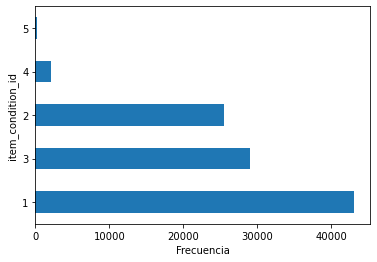

In [21]:
#diagrama horizontal
data["item_condition_id"].value_counts().plot(kind="barh")
plt.xlabel("Frecuencia")
plt.ylabel("item_condition_id")

### Ejercicio

Busca el número de registros con la peor condición disponible y un precio mayor o igual a 20 dólares

#### Respuesta

In [22]:
con = data[(data['item_condition_id']==5) & (data['price']>=20)]
con.shape

(85, 8)

### Columna *category_name*

### Ejercicio 

Cuantas diferentes categorias hay y cuales son las más frecuentes en porcentajes?

#### Respuesta

In [23]:
data['category_name'].value_counts(normalize=True)

Women/Athletic Apparel/Pants, Tights, Leggings    0.040409
Women/Tops & Blouses/T-Shirts                     0.030788
Beauty/Makeup/Face                                0.023136
Beauty/Makeup/Lips                                0.020636
Beauty/Makeup/Eyes                                0.017463
                                                    ...   
Kids/Health & Baby Care/Sun Protection            0.000010
Men/Shoes/Work & Safety                           0.000010
Electronics/TV, Audio & Surveillance/Other        0.000010
Handmade/Housewares/Lighting                      0.000010
Vintage & Collectibles/Paper Ephemera/Other       0.000010
Name: category_name, Length: 971, dtype: float64

In [24]:
data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [25]:
len(data['category_name'].value_counts(normalize=True))

971

### Ejercicio

Muestra una lista de las categorias que aparecen en la columna *category_name* y cuantos elementos tiene esa lista?

#### Respuesta

In [26]:
data['category_name'].unique()

array(['Men/Tops/T-shirts',
       'Electronics/Computers & Tablets/Components & Parts',
       'Women/Tops & Blouses/Blouse',
       'Home/Home Décor/Home Décor Accents', 'Women/Jewelry/Necklaces',
       'Women/Other/Other', 'Women/Swimwear/Two-Piece',
       'Sports & Outdoors/Apparel/Girls',
       'Vintage & Collectibles/Collectibles/Doll', 'Beauty/Makeup/Face',
       'Beauty/Fragrance/Women', 'Women/Dresses/Above Knee, Mini',
       'Other/Office supplies/School Supplies', 'Women/Shoes/Boots',
       'Beauty/Makeup/Makeup Sets', 'Beauty/Makeup/Eyes',
       'Kids/Gear/Backpacks & Carriers', 'Beauty/Makeup/Makeup Palettes',
       'Women/Tops & Blouses/Tank, Cami',
       'Women/Athletic Apparel/Sports Bras',
       'Electronics/Cell Phones & Accessories/Cell Phones & Smartphones',
       'Electronics/Cell Phones & Accessories/Chargers & Cradles',
       'Women/Tops & Blouses/T-Shirts', 'Men/Shoes/Athletic',
       'Electronics/Cell Phones & Accessories/Cases, Covers & Skins',
  

In [27]:
# numero de elementos unicos en una lista.
print("El número de categorias es de ", data['category_name'].nunique())

El número de categorias es de  971


## Manipulación de strings o cadenas de letras

#### Como definir un string?

variable = "... contenido..."

In [28]:
texto="Soy estudiante de informatica III"
print(texto)

Soy estudiante de informatica III


#### Separar una oracion en diferentes partes según un separador.

comando : string.split("separador")

retorna una lista con los elementos que se derivan de separar el string *string* según el separador indicado.

### Ejercicio

Toma el string *soy estudiante de informatica III" y separalo en substrings usando como separador un spacio en blanco " "

#### Respuesta

In [29]:
texto="soy estudiante de informatica III"
texto.split(" ")

['soy', 'estudiante', 'de', 'informatica', 'III']

## Funciones anónimas

Una función anónima, como su nombre indica es una función sin nombre. Es decir, es posible ejecutar una función sin referenciar un nombre, en Python puede ejecutar una función sin definirla con def.

De hecho son similares pero con una diferencia fundamental, el contenido de una función anónima debe ser una única expresión en lugar de un bloque de acciones.

Las funciones anónimas se implementan en Python con las funciones o expresiones *lambda*.

Más allá del sentido de función que usted tiene hasta el momento, con su nombre y sus acciones internas, una función en su sentido más trivial significa realizar algo sobre algo. Por tanto se podría decir que, mientras las funciones anónimas lambda sirven para realizar funciones simples, las funciones definidas con def sirven para manejar tareas más extensas.

### Ejercicio

Escribir una función anonima que convierta cada valor de la columna *price* a su respectivo valor con un 19% de IVA. El resultado lo debe almacenar en una columna de nombre *priceiva*.

#### Respuesta

In [30]:
data["priceiva"] = data["price"].apply(lambda x: x*1.19)


### Ejercicio

Escriba una función anonima que aplique un descuento del 20% si el valor de compra es mayor al 20 dólares. El resultado lo debe almacenar en una columna de nombre "descuento".

#### Respuesta

### Ejercicio

Crea tres columnas:

    a) main_cat : categoria principal que almacene la categoria principal indicada en la columna "category_name".
    
    b) subcat_1 : categoria secundaria que almacena la segunda categoria despues de la principal.
    c) subcat_2 : categoria auxiliar que almacena la tercera categoria despues de la principal.
    
#### Respuesta

In [31]:
def split_cat(text):
    try: return text.split("/")
    except: return ("Category Unknown", "Category Unknown", "Category Unknown")
    
data['main_cat'], data['subcat_1'], data['subcat_2'] = zip(*data['category_name'].apply(lambda x: split_cat(x)))


### Ejercicio

Cuántas categorias principales hay? y cual es su contribución porcentual con respecto a las ventas?

#### Respuesta

In [32]:
data["main_cat"].value_counts(normalize=True)*100

Women                     44.950
Beauty                    14.158
Kids                      11.470
Electronics                8.286
Men                        6.270
Home                       4.546
Vintage & Collectibles     3.123
Other                      3.043
Handmade                   2.064
Sports & Outdoors          1.673
Category Unknown           0.417
Name: main_cat, dtype: float64

### Ejercicio

Muestre un histograma de la distribución de las ventas según las categorias principales

#### Respuesta

Text(0, 0.5, 'Frecuencia')

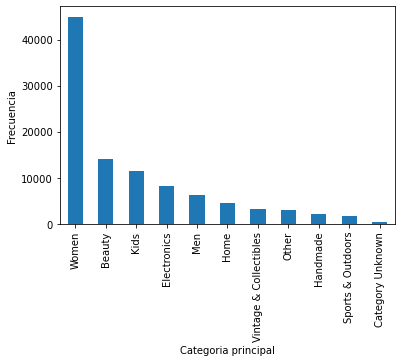

In [33]:
data["main_cat"].value_counts().plot(kind="bar")
plt.xlabel("Categoria principal")
plt.ylabel("Frecuencia")

### Ejercicio

Cuántas categorias secundarias hay? y muestre un histograma de la distribución de las ventas según esas categorias?

#### Respuesta

### Ejercicio

Cuántas categorias auxiliares hay? y muestre un histograma de la distribución de las ventas según esas categorias?

#### Respuesta

### Groupby

La función de Pandas dataframe.groupby () se utiliza para dividir los datos en grupos según algunos criterios y realizar operaciones sobre ellos.


### Ejercicio 

Construya una subtabla del dataframe *data* con sólo las columnas "shipping" y "price". Imprima los primeros 15 registros.

#### Respuesta

In [84]:
data1 = data[["shipping","price"]]
data1.head(15)

,shipping,price
0,1,10.0
1,0,52.0
2,1,10.0
3,1,35.0
4,0,44.0
5,0,59.0
6,0,64.0
7,1,6.0
8,0,19.0
9,0,8.0


### Ejercicio

Agrupe el precio según la modalidad de envio y calcule el precio promedio de compra en cada envio.

#### Respuesta

In [34]:
data[["shipping","price"]].groupby(["shipping"]).mean()


,price
shipping,
0,30.123853
1,22.469734


### Ejercicio

Agrupe los datos según la categoria principal y aplique la función describe()
#### Respuesta

In [35]:
data[["main_cat","price"]].groupby(["main_cat"]).describe()

price                                               \
                          count       mean        std  min   25%   50%   75%   
main_cat                                                                       
Beauty                  14158.0  19.826635  20.804827  0.0  10.0  15.0  24.0   
Category Unknown          417.0  26.779376  34.698416  0.0  10.0  17.0  28.0   
Electronics              8286.0  34.822894  66.206490  0.0   9.0  15.0  30.0   
Handmade                 2064.0  18.207364  32.998944  0.0   6.0  11.0  19.0   
Home                     4546.0  24.743181  25.248544  0.0  12.0  18.0  29.0   
Kids                    11470.0  20.519486  22.394105  0.0  10.0  14.0  24.0   
Men                      6270.0  34.943222  39.965529  0.0  14.0  21.0  40.0   
Other                    3043.0  20.117318  26.221187  0.0   9.0  13.0  22.0   
Sports & Outdoors        1673.0  25.497908  26.217122  0.0  11.0  17.0  29.0   
Vintage & Collectibles   3123.0  27.797951  51.345582  3.0  10.0  16.0  27.0   
Women                   44950.0  28.792492  38.335111  0.0  12.0  19.0  33.0   

                                
                           max  
main_cat                        
Beauty                   980.0  
Category Unknown         359.0  
Electronics             1215.0  
Handmade                 906.0  
Home                     406.0  
Kids                     525.0  
Men                      525.0  
Other                    650.0  
Sports & Outdoors        250.0  
Vintage & Collectibles  1109.0  
Women                   1506.0

### Ejercicio

Agrupe el precio según la modalidad de envio y calcule todas las medidas estadísticas con el método describe por modalidad.

#### Respuesta

In [36]:
data[["shipping","price"]].groupby(["shipping"]).describe()

price                                                     
            count       mean        std  min   25%   50%   75%     max
shipping                                                              
0         55247.0  30.123853  39.676495  0.0  13.0  20.0  33.0  1506.0
1         44753.0  22.469734  35.229767  0.0   8.0  14.0  25.0  1500.0

### Ejercicio

Agrupe el precio según la categoria principal y la modalidad de envio. Calcule el precio promedio de compra asociado con cada categoria principal y modalidad de envio.

#### Respuesta

In [37]:
data[["main_cat","shipping","price"]].groupby(["main_cat","shipping"]).describe()

price                                   \
                                   count       mean        std  min   25%   
main_cat               shipping                                             
Beauty                 0          5632.0  23.384677  18.860270  0.0  12.0   
                       1          8526.0  17.476308  21.678344  0.0   8.0   
Category Unknown       0           264.0  30.200758  37.532666  0.0  14.0   
                       1           153.0  20.875817  28.324325  0.0   8.0   
Electronics            0          3414.0  47.906122  81.060158  0.0  13.0   
                       1          4872.0  25.654967  51.453509  0.0   8.0   
Handmade               0           776.0  26.595361  43.561820  6.0  12.0   
                       1          1288.0  13.153727  23.126045  0.0   5.0   
Home                   0          3238.0  27.458462  25.813395  0.0  14.0   
                       1          1308.0  18.021407  22.429033  3.0   8.0   
Kids                   0          6733.0  23.083989  23.959763  0.0  11.0   
                       1          4737.0  16.874393  19.385602  0.0   8.0   
Men                    0          4120.0  36.703155  39.332702  0.0  14.0   
                       1          2150.0  31.570698  40.949405  0.0  11.0   
Other                  0          1400.0  24.405000  26.513128  7.0  11.0   
                       1          1643.0  16.463786  25.413015  0.0   7.0   
Sports & Outdoors      0           915.0  27.822951  25.299807  0.0  13.0   
                       1           758.0  22.691293  27.034832  0.0  10.0   
Vintage & Collectibles 0          1387.0  34.825523  57.387243  7.0  14.0   
                       1          1736.0  22.183180  45.189373  3.0   7.0   
Women                  0         27368.0  30.579783  38.329196  0.0  14.0   
                       1         17582.0  26.010408  38.179276  0.0  10.0   

                                                     
                                  50%   75%     max  
main_cat               shipping                      
Beauty                 0         18.0  28.0   248.0  
                       1         13.0  20.0   980.0  
Category Unknown       0         20.0  31.0   359.0  
                       1         11.0  20.0   185.0  
Electronics            0         22.0  46.0  1215.0  
                       1         12.0  22.0  1000.0  
Handmade               0         17.0  28.0   906.0  
                       1          8.0  14.0   435.0  
Home                   0         21.0  32.0   406.0  
                       1         12.0  20.0   360.0  
Kids                   0         16.0  26.0   525.0  
                       1         12.0  20.0   360.0  
Men                    0         24.0  41.0   356.0  
                       1         19.0  35.0   525.0  
Other                  0         16.0  27.0   486.0  
                       1         10.0  18.0   650.0  
Sports & Outdoors      0         19.0  31.0   234.0  
                       1         15.0  24.0   250.0  
Vintage & Collectibles 0         20.0  34.0  1109.0  
                       1         13.0  23.0   900.0  
Women                  0         20.0  34.0  1506.0  
                       1         16.0  30.0  1500.0

### Ejercicio

Determina el porcentaje de compras asociadas con la primera subcategoria

#### Respuesta

In [38]:
data['subcat_1'].value_counts(normalize=True).head(10)

Athletic Apparel             0.09006
Makeup                       0.08501
Tops & Blouses               0.07105
Shoes                        0.06832
Jewelry                      0.04211
Toys                         0.03927
Cell Phones & Accessories    0.03612
Dresses                      0.03130
Women's Handbags             0.03060
Women's Accessories          0.02822
Name: subcat_1, dtype: float64

### Ejercicio

Muestra los 10 primeros registros asociados con la subcategoria *Toys*

#### Respuesta

In [39]:
paper = data[data['subcat_1']=='Toys']
paper.head(6)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,priceiva,main_cat,subcat_1,subcat_2
34,34,Four puppy dog stuffed animal ty,3,Kids/Toys/Stuffed Animals & Plush,NaN,5.0,1,2 beanie babies pugsley wrinkles Puppy with pu...,5.95,Kids,Toys,Stuffed Animals & Plush
46,46,Metallic purple slime with sparkles,1,Kids/Toys/Arts & Crafts,NaN,8.0,0,"This slime is approximately 1.5 ounces, very s...",9.52,Kids,Toys,Arts & Crafts
65,65,New Holiday BARBIE,1,Kids/Toys/Dolls & Accessories,Barbie,13.0,0,Brand New,15.47,Kids,Toys,Dolls & Accessories
75,75,Littlest pet shop accessories for Bon,3,Kids/Toys/Dolls & Accessories,Littlest Pet Shop,12.0,1,these are on hold do not buy :),14.28,Kids,Toys,Dolls & Accessories
87,87,Melissa and Doug folding go kitchen,3,Kids/Toys/Dress Up & Pretend Play,Melissa & Doug,34.0,0,Used but still a great play item.,40.46,Kids,Toys,Dress Up & Pretend Play
94,94,Hatchimals Draggle,1,Kids/Toys/Electronics for Kids,Spin Master,150.0,1,BNIP VHTF! HOTTEST toy of the season!,178.50,Kids,Toys,Electronics for Kids


### Ejercicio

Muestre en un diagrama de barras horizontal las 10 primeras subcategorias más populares

#### Respuesta

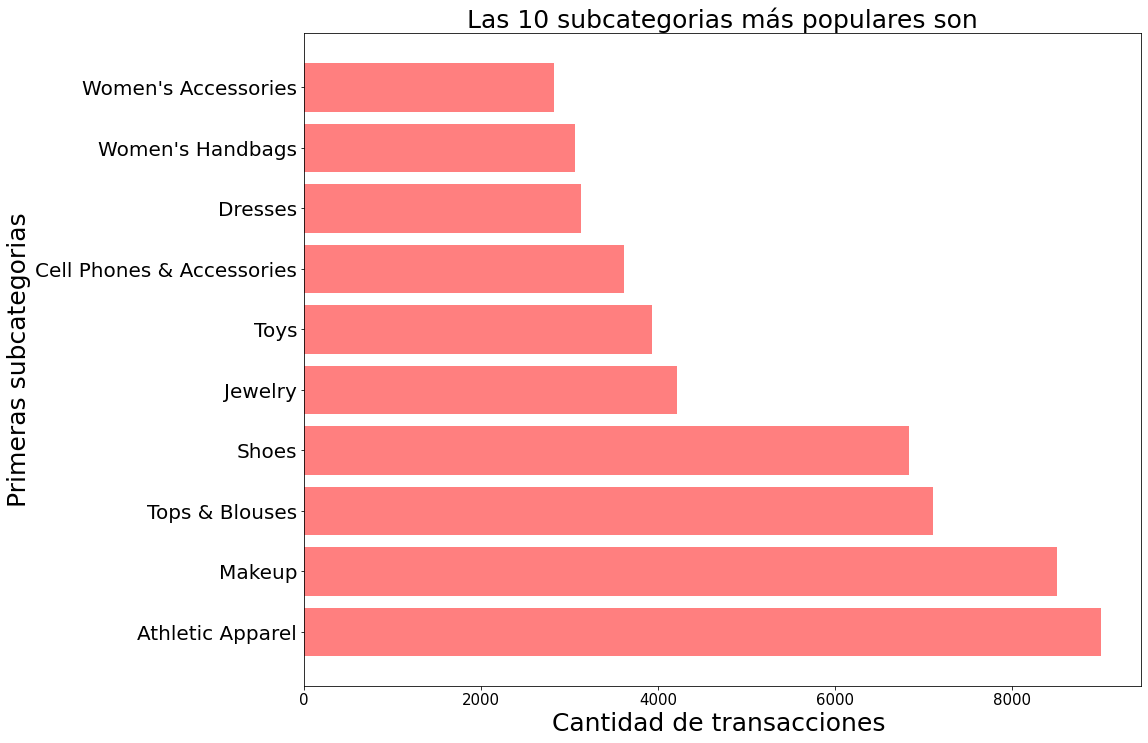

In [40]:
x = data['subcat_1'].value_counts().index[:10]
y = data['subcat_1'].value_counts().values[:10]

plt.figure(figsize=(15,12))
plt.barh(x, y, align='center', alpha=0.5, color='red')
plt.yticks(x, fontsize=20)
plt.xticks(fontsize=15)
plt.title('Las 10 subcategorias más populares son', fontsize=25)
plt.xlabel('Cantidad de transacciones ', fontsize=25)
plt.ylabel('Primeras subcategorias', fontsize=25)
plt.show()

## Brand (Marca)

### Ejercicio

Muestre en procentaje las 10 marcas más populares

#### Respuesta

In [41]:
(data['brand_name'].value_counts(normalize=True)*100).head(10)

PINK                 6.494849
Nike                 6.347677
Victoria's Secret    5.653865
LuLaRoe              3.705586
Apple                2.013105
FOREVER 21           1.829140
Nintendo             1.804611
Lululemon            1.717009
Michael Kors         1.589109
American Eagle       1.564581
Name: brand_name, dtype: float64

### Ejercicio

Imprima un texto que diga el número de marcas que hay 

#### Respuesta

In [42]:
print('There are', data['brand_name'].nunique(), 'unique brands in the data')

There are 2067 unique brands in the data


### Ejercicio

Determine si hay algun tipo de marca (brand_name) que no esta disponible y cuantos registros no tienen marca indicada.

#### Respuesta

In [43]:
data["brand_name"].unique()

array([nan, 'Razer', 'Target', ..., 'Midway', 'Lord & Taylor',
       'Kirkland Signature'], dtype=object)

In [44]:
data["brand_name"].isna()

0         True
1        False
2        False
3         True
4         True
         ...  
99995     True
99996     True
99997     True
99998    False
99999    False
Name: brand_name, Length: 100000, dtype: bool

In [45]:
data[data["brand_name"].isna()].shape

(42924, 12)

### Ejercicio

Coloca en aquellos campos donde la marca no esta disponible la leyenda "marca no disponible".

El método *fillna('mensaje')* remplaza los valores nan por el *mensaje* indicado.

#### Respuesta

In [46]:
data['brand_name'] = data['brand_name'].fillna('Marca no disponible')

In [47]:
data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,priceiva,main_cat,subcat_1,subcat_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,Marca no disponible,10.0,1,No description yet,11.90,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,61.88,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,11.90,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,Marca no disponible,35.0,1,New with tags. Leather horses. Retail for [rm]...,41.65,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,Marca no disponible,44.0,0,Complete with certificate of authenticity,52.36,Women,Jewelry,Necklaces


### Ejercicio

Determina cuántos registros tienen su marca disponible

#### Respuesta

In [48]:
data[data['brand_name']!='Marca no disponible']

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,priceiva,main_cat,subcat_1,subcat_2
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,61.88,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,11.90,Women,Tops & Blouses,Blouse
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...,76.16,Women,Swimwear,Two-Piece
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...,7.14,Sports & Outdoors,Apparel,Girls
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.,22.61,Sports & Outdoors,Apparel,Girls
...,...,...,...,...,...,...,...,...,...,...,...,...
99989,99989,American Eagle straight stretch size 4,3,Women/Jeans/Straight Leg,American Eagle,17.0,0,American Eagle straight stretch size 4 Measure...,20.23,Women,Jeans,Straight Leg
99990,99990,Urban Decay Gwen Stefani shadow palette,2,Beauty/Makeup/Makeup Palettes,Urban Decay,22.0,1,No description yet,26.18,Beauty,Makeup,Makeup Palettes
99991,99991,Urban decay moondust palette,2,Beauty/Makeup/Makeup Palettes,Urban Decay,24.0,0,Lightly used Still looks brand new 100% authentic,28.56,Beauty,Makeup,Makeup Palettes
99998,99998,Brown North Face Jacket,2,Women/Athletic Apparel/Jackets,The North Face,30.0,1,Super soft brown North Face zip up. Hardly use...,35.70,Women,Athletic Apparel,Jackets


### Ejercicio

Calcule las medidas estadísticas de las ventas de los productos registrados de acuerdo con la marca. Imprima los primeros 15 registros. 

#### Respuesta

In [79]:
data[["brand_name","price"]].groupby(["brand_name"]).describe().head(15)

price                                               \
                    count        mean        std    min     25%    50%   
brand_name                                                               
% Pure                3.0   16.333333   6.658328   12.0   12.50   13.0   
3.1 Phillip Lim       1.0  200.000000        NaN  200.0  200.00  200.0   
47 Brand              6.0   12.666667   1.966384    9.0   12.25   13.5   
5.11 Tactical         1.0   12.000000        NaN   12.0   12.00   12.0   
5th & Ocean           1.0   15.000000        NaN   15.0   15.00   15.0   
7 For All Mankind®   25.0   30.880000  28.885290   12.0   21.00   24.0   
90 Degree By Reflex   3.0   15.000000   6.244998    8.0   12.50   17.0   
A Bathing Ape         6.0   46.166667  17.046016   26.0   35.00   44.0   
A Pea In The Pod      2.0   13.000000   1.414214   12.0   12.50   13.0   
A Plus Child Supply   2.0    8.000000   0.000000    8.0    8.00    8.0   
A&A Optical           1.0   25.000000        NaN   25.0   25.00   25.0   
A&E                   1.0   14.000000        NaN   14.0   14.00   14.0   
A+D                   1.0    7.000000        NaN    7.0    7.00    7.0   
A. Byer               4.0    9.000000   2.160247    7.0    7.75    8.5   
A.D. Sutton & Sons    1.0    9.000000        NaN    9.0    9.00    9.0   

                                    
                        75%    max  
brand_name                          
% Pure                18.50   24.0  
3.1 Phillip Lim      200.00  200.0  
47 Brand              14.00   14.0  
5.11 Tactical         12.00   12.0  
5th & Ocean           15.00   15.0  
7 For All Mankind®    26.00  142.0  
90 Degree By Reflex   18.50   20.0  
A Bathing Ape         54.50   73.0  
A Pea In The Pod      13.50   14.0  
A Plus Child Supply    8.00    8.0  
A&A Optical           25.00   25.0  
A&E                   14.00   14.0  
A+D                    7.00    7.0  
A. Byer                9.75   12.0  
A.D. Sutton & Sons     9.00    9.0

### Ejercicio

Calcule las medidas estadísticas de las ventas de los productos registrados de acuerdo con la marca y el modo de envio. Imprima los primeros 15 registros. 

#### Respuesta

In [80]:
data[["brand_name","shipping","price"]].groupby(["brand_name","shipping"]).describe().head(15)

price                                        \
                             count        mean        std    min     25%   
brand_name          shipping                                               
% Pure              0          1.0   24.000000        NaN   24.0   24.00   
                    1          2.0   12.500000   0.707107   12.0   12.25   
3.1 Phillip Lim     1          1.0  200.000000        NaN  200.0  200.00   
47 Brand            0          3.0   12.333333   2.886751    9.0   11.50   
                    1          3.0   13.000000   1.000000   12.0   12.50   
5.11 Tactical       1          1.0   12.000000        NaN   12.0   12.00   
5th & Ocean         1          1.0   15.000000        NaN   15.0   15.00   
7 For All Mankind®  0         16.0   35.687500  35.235813   14.0   21.75   
                    1          9.0   22.333333   6.837397   12.0   18.00   
90 Degree By Reflex 0          1.0    8.000000        NaN    8.0    8.00   
                    1          2.0   18.500000   2.121320   17.0   17.75   
A Bathing Ape       0          4.0   47.250000  21.344398   26.0   32.00   
                    1          2.0   44.000000   8.485281   38.0   41.00   
A Pea In The Pod    0          2.0   13.000000   1.414214   12.0   12.50   
A Plus Child Supply 1          2.0    8.000000   0.000000    8.0    8.00   

                                                    
                                50%     75%    max  
brand_name          shipping                        
% Pure              0          24.0   24.00   24.0  
                    1          12.5   12.75   13.0  
3.1 Phillip Lim     1         200.0  200.00  200.0  
47 Brand            0          14.0   14.00   14.0  
                    1          13.0   13.50   14.0  
5.11 Tactical       1          12.0   12.00   12.0  
5th & Ocean         1          15.0   15.00   15.0  
7 For All Mankind®  0          24.0   26.00  142.0  
                    1          25.0   25.00   32.0  
90 Degree By Reflex 0           8.0    8.00    8.0  
                    1          18.5   19.25   20.0  
A Bathing Ape       0          45.0   60.25   73.0  
                    1          44.0   47.00   50.0  
A Pea In The Pod    0          13.0   13.50   14.0  
A Plus Child Supply 1           8.0    8.00    8.0